In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/india-crime-rate/india-crime-rate-statistics.csv
/kaggle/input/countries-dataset-2020/Properties price index by countries 2020.csv
/kaggle/input/countries-dataset-2020/Crime index by countries 2020.csv
/kaggle/input/countries-dataset-2020/Quality of life index by countries 2020.csv
/kaggle/input/countries-dataset-2020/Cost of living index by country 2020.csv
/kaggle/input/countries-dataset-2020/Pupulation density by countries.csv
/kaggle/input/countries-dataset-2020/Health care index by countries 2020.csv
/kaggle/input/countries-dataset-2020/Coutries age structure.csv
/kaggle/input/worl-bank-data/8f7d4c09-e7b5-45f6-acd1-01ccfda30cd4_Data.csv
/kaggle/input/worl-bank-data/8f7d4c09-e7b5-45f6-acd1-01ccfda30cd4_Series - Metadata.csv
/kaggle/input/crime-rate-in-india/en.csv


In [2]:
data=pd.read_csv('/kaggle/input/india-crime-rate/india-crime-rate-statistics.csv')
data=data.loc[15:]
data.columns = data.iloc[0]
data = data[1:]
data=data.reset_index(drop=True)

In [3]:
Ind_crimes=data.copy()

In [4]:
coun_crimes=pd.read_csv('/kaggle/input/countries-dataset-2020/Crime index by countries 2020.csv')
coun_crimes

Country  Crime Index  Safety Index
0               Venezuela        84.49         15.51
1        Papua New Guinea        81.93         18.07
2            South Africa        77.49         22.51
3             Afghanistan        76.23         23.77
4                Honduras        76.11         23.89
..                    ...          ...           ...
124                 Japan        20.66         79.34
125               Georgia        20.21         79.79
126  United Arab Emirates        15.70         84.30
127                Taiwan        15.65         84.35
128                 Qatar        11.86         88.14

[129 rows x 3 columns]

In [5]:
world_bank_data =pd.read_csv('/kaggle/input/worl-bank-data/8f7d4c09-e7b5-45f6-acd1-01ccfda30cd4_Data.csv')


In [6]:
crime_data=world_bank_data[world_bank_data['Series Code']=='VC.IHR.PSRC.P5']

In [7]:
crime_data[crime_data['Country Name']=='India'].drop(columns=['Country Code','Series Code'])

Series Name Country Name 1973 [YR1973]  \
89  Intentional homicides (per 100,000 people)        India            ..   

   1974 [YR1974] 1975 [YR1975] 1976 [YR1976] 1977 [YR1977] 1978 [YR1978]  \
89            ..            ..            ..            ..            ..   

   1979 [YR1979] 1980 [YR1980]  ...     2013 [YR2013]     2014 [YR2014]  \
89            ..            ..  ...  3.55331583011222  3.62257613036012   

       2015 [YR2015]     2016 [YR2016]     2017 [YR2017]     2018 [YR2018]  \
89  3.35430671568569  3.16142620301247  3.02888279891311  2.99378385759947   

       2019 [YR2019]     2020 [YR2020]     2021 [YR2021] 2022 [YR2022]  
89  2.92666092999238  2.91115545352632  2.93627889313173            ..  

[1 rows x 52 columns]

In [8]:
crime_dat_ind= crime_data[crime_data['Country Name']=='India'].drop(columns=['Country Code','Series Code'])
# Melt the DataFrame to convert year columns into rows
melted_df = pd.melt(crime_dat_ind, id_vars=['Country Name','Series Name'], var_name='Year', value_name='Value')

# Optionally, you can sort the resulting DataFrame by 'Country' and 'Year'
melted_df = melted_df.sort_values(['Country Name', 'Year'])

# Reset the index if needed
melted_df.reset_index(drop=True, inplace=True)

In [9]:

melted_df.Value=pd.to_numeric(melted_df.Value, errors='coerce')
melted_df = melted_df.dropna(subset=['Value'])
melted_df


Country Name                                 Series Name           Year  \
17        India  Intentional homicides (per 100,000 people)  1990 [YR1990]   
18        India  Intentional homicides (per 100,000 people)  1991 [YR1991]   
19        India  Intentional homicides (per 100,000 people)  1992 [YR1992]   
20        India  Intentional homicides (per 100,000 people)  1993 [YR1993]   
21        India  Intentional homicides (per 100,000 people)  1994 [YR1994]   
22        India  Intentional homicides (per 100,000 people)  1995 [YR1995]   
23        India  Intentional homicides (per 100,000 people)  1996 [YR1996]   
24        India  Intentional homicides (per 100,000 people)  1997 [YR1997]   
25        India  Intentional homicides (per 100,000 people)  1998 [YR1998]   
26        India  Intentional homicides (per 100,000 people)  1999 [YR1999]   
27        India  Intentional homicides (per 100,000 people)  2000 [YR2000]   
28        India  Intentional homicides (per 100,000 people)  2001 [YR2001]   
29        India  Intentional homicides (per 100,000 people)  2002 [YR2002]   
30        India  Intentional homicides (per 100,000 people)  2003 [YR2003]   
31        India  Intentional homicides (per 100,000 people)  2004 [YR2004]   
32        India  Intentional homicides (per 100,000 people)  2005 [YR2005]   
33        India  Intentional homicides (per 100,000 people)  2006 [YR2006]   
34        India  Intentional homicides (per 100,000 people)  2007 [YR2007]   
35        India  Intentional homicides (per 100,000 people)  2008 [YR2008]   
36        India  Intentional homicides (per 100,000 people)  2009 [YR2009]   
37        India  Intentional homicides (per 100,000 people)  2010 [YR2010]   
38        India  Intentional homicides (per 100,000 people)  2011 [YR2011]   
39        India  Intentional homicides (per 100,000 people)  2012 [YR2012]   
40        India  Intentional homicides (per 100,000 people)  2013 [YR2013]   
41        India  Intentional homicides (per 100,000 people)  2014 [YR2014]   
42        India  Intentional homicides (per 100,000 people)  2015 [YR2015]   
43        India  Intentional homicides (per 100,000 people)  2016 [YR2016]   
44        India  Intentional homicides (per 100,000 people)  2017 [YR2017]   
45        India  Intentional homicides (per 100,000 people)  2018 [YR2018]   
46        India  Intentional homicides (per 100,000 people)  2019 [YR2019]   
47        India  Intentional homicides (per 100,000 people)  2020 [YR2020]   
48        India  Intentional homicides (per 100,000 people)  2021 [YR2021]   

       Value  
17  5.073455  
18  5.464250  
19  5.474815  
20  5.175898  
21  5.020619  
22  4.810433  
23  4.770965  
24  4.730753  
25  4.825762  
26  4.592119  
27  4.545628  
28  4.302248  
29  4.164204  
30  3.967281  
31  4.091477  
32  3.905551  
33  3.835040  
34  3.812920  
35  3.811857  
36  3.744892  
37  3.744921  
38  3.788104  
39  3.725263  
40  3.553316  
41  3.622576  
42  3.354307  
43  3.161426  
44  3.028883  
45  2.993784  
46  2.926661  
47  2.911155  
48  2.936279

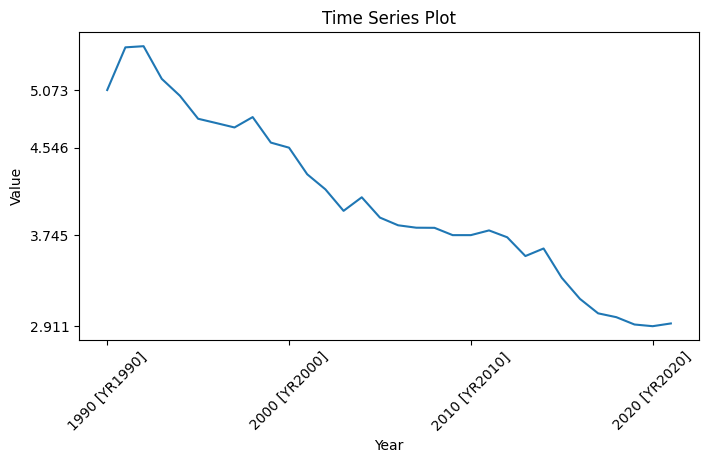

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))  # Set the figure size

# Using lineplot
sns.lineplot(x='Year', y='Value', data=melted_df)
plt.title('Time Series Plot')
plt.xlabel('Year')
plt.ylabel('Value')

# Set the y-axis ticks to show only every N years
# For example, to show every 5 years, you can use:
N = 10
years = melted_df['Year']
values= melted_df['Value']
plt.xticks(years[::N])
plt.yticks(values[::N])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Show the plot
plt.show()


In [11]:
world_bank_data
data_cl=world_bank_data.copy()

In [12]:
data_cl

Series Name     Series Code  \
0            Intentional homicides (per 100,000 people)  VC.IHR.PSRC.P5   
1            Intentional homicides (per 100,000 people)  VC.IHR.PSRC.P5   
2            Intentional homicides (per 100,000 people)  VC.IHR.PSRC.P5   
3            Intentional homicides (per 100,000 people)  VC.IHR.PSRC.P5   
4            Intentional homicides (per 100,000 people)  VC.IHR.PSRC.P5   
...                                                 ...             ...   
37506                                               NaN             NaN   
37507                                               NaN             NaN   
37508                                               NaN             NaN   
37509  Data from database: World Development Indicators             NaN   
37510                          Last Updated: 09/19/2023             NaN   

         Country Name Country Code 1973 [YR1973] 1974 [YR1974] 1975 [YR1975]  \
0         Afghanistan          AFG            ..            ..            ..   
1             Albania          ALB            ..            ..            ..   
2             Algeria          DZA            ..            ..            ..   
3      American Samoa          ASM            ..            ..            ..   
4             Andorra          AND            ..            ..            ..   
...               ...          ...           ...           ...           ...   
37506             NaN          NaN           NaN           NaN           NaN   
37507             NaN          NaN           NaN           NaN           NaN   
37508             NaN          NaN           NaN           NaN           NaN   
37509             NaN          NaN           NaN           NaN           NaN   
37510             NaN          NaN           NaN           NaN           NaN   

      1976 [YR1976] 1977 [YR1977] 1978 [YR1978]  ...     2013 [YR2013]  \
0                ..            ..            ..  ...                ..   
1                ..            ..            ..  ...   4.2950952090984   
2                ..            ..            ..  ...  1.26313706959542   
3                ..            ..            ..  ...  5.66091140673648   
4                ..            ..            ..  ...                 0   
...             ...           ...           ...  ...               ...   
37506           NaN           NaN           NaN  ...               NaN   
37507           NaN           NaN           NaN  ...               NaN   
37508           NaN           NaN           NaN  ...               NaN   
37509           NaN           NaN           NaN  ...               NaN   
37510           NaN           NaN           NaN  ...               NaN   

          2014 [YR2014]     2015 [YR2015]     2016 [YR2016]     2017 [YR2017]  \
0                    ..  9.97526212023234  6.69241862002357  6.80069468647332   
1      4.64616022595595  2.22030990322398  2.74204347492575  2.01434001712189   
2      1.48864165770181  1.38076996361026  1.34360193923407  1.27380650772187   
3      5.74531039039384  7.78694907335306                 0  14.1519923983584   
4                     0                 0                ..                ..   
...                 ...               ...               ...               ...   
37506               NaN               NaN               NaN               NaN   
37507               NaN               NaN               NaN               NaN   
37508               NaN               NaN               NaN               NaN   
37509               NaN               NaN               NaN               NaN   
37510               NaN               NaN               NaN               NaN   

          2018 [YR2018]     2019 [YR2019]     2020 [YR2020]     2021 [YR2021]  \
0      6.74357283538399  7.18039716624779  6.59443908400367  4.02249785795131   
1      2.29404594278858  2.26174791010144  2.12777201167065  2.31196864129807   
2      1.35473538571451  1.21530387918325  1.50512065521262  1.57318234314011

In [13]:
# Melt the DataFrame to convert year columns into rows
data_cl=pd.melt(data_cl, id_vars=['Country Name','Series Name','Series Code','Country Code'], var_name='Year', value_name='Value')



In [14]:
data_cl

Country Name                                       Series Name  \
0           Afghanistan        Intentional homicides (per 100,000 people)   
1               Albania        Intentional homicides (per 100,000 people)   
2               Algeria        Intentional homicides (per 100,000 people)   
3        American Samoa        Intentional homicides (per 100,000 people)   
4               Andorra        Intentional homicides (per 100,000 people)   
...                 ...                                               ...   
1875545             NaN                                               NaN   
1875546             NaN                                               NaN   
1875547             NaN                                               NaN   
1875548             NaN  Data from database: World Development Indicators   
1875549             NaN                          Last Updated: 09/19/2023   

            Series Code Country Code           Year Value  
0        VC.IHR.PSRC.P5          AFG  1973 [YR1973]    ..  
1        VC.IHR.PSRC.P5          ALB  1973 [YR1973]    ..  
2        VC.IHR.PSRC.P5          DZA  1973 [YR1973]    ..  
3        VC.IHR.PSRC.P5          ASM  1973 [YR1973]    ..  
4        VC.IHR.PSRC.P5          AND  1973 [YR1973]    ..  
...                 ...          ...            ...   ...  
1875545             NaN          NaN  2022 [YR2022]   NaN  
1875546             NaN          NaN  2022 [YR2022]   NaN  
1875547             NaN          NaN  2022 [YR2022]   NaN  
1875548             NaN          NaN  2022 [YR2022]   NaN  
1875549             NaN          NaN  2022 [YR2022]   NaN  

[1875550 rows x 6 columns]

In [15]:
data_cl.Value=pd.to_numeric(data_cl.Value, errors='coerce')
data_cl['Series Name'].value_counts()

Series Name
Intentional homicides (per 100,000 people)                                                      13300
Political Stability and Absence of Violence/Terrorism: Percentile Rank                          13300
Multidimensional poverty index (scale 0-1)                                                      13300
PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)                          13300
PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)    13300
                                                                                                ...  
Female share of employment in senior and middle management (%)                                  13300
GDP growth (annual %)                                                                           13300
GDP per capita growth (annual %)                                                                13300
Data from database: World Development Indicators                      

In [16]:
data_cl['Country Name'].nunique()

266

In [17]:
data_cl[data_cl['Series Name']=='Intentional homicides (per 100,000 people)']['Value'].describe()

count    4209.000000
mean        8.035708
std        12.026623
min         0.000000
25%         1.348194
50%         3.428468
75%         9.402278
max       138.773986
Name: Value, dtype: float64

In [18]:
# data_cl.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value')

In [19]:
c=['Data from database: World Development Indicators','Last Updated: 09/19/2023']
data_cl=data_cl[~data_cl['Series Name'].isin(c)]

In [20]:
data_cl.dropna(subset=['Value'])['Series Name'].value_counts()

Series Name
Population ages 15-64 (% of total population)                                                                        13250
Population ages 15-64, female                                                                                        13233
Population growth (annual %)                                                                                         13231
Urban population (% of total population)                                                                             13150
Rural population (% of total population)                                                                             13150
                                                                                                                     ...  
Survey mean consumption or income per capita, bottom 40% of population (2017 PPP $ per day)                            244
Survey mean consumption or income per capita, total population (2017 PPP $ per day)                                    244
Annu

In [21]:

# data_melt=pd.melt(world_bank_data, id_vars=['Country Name','Series Name','Series Code','Country Code'], var_name='Year', value_name='Value')
# data_melt.dropna(subset=['Value'])['Series Name'].value_counts()

In [22]:
# data_melt[data_melt['Series Name']=='Intentional homicides (per 100,000 people)']['Value'].value_counts()

In [23]:
data_cl=data_cl.drop_duplicates()


In [24]:
data_reform=data_cl.pivot(index=['Country Name','Year'], columns='Series Name', values='Value')

In [25]:
data_reform['Intentional homicides (per 100,000 people)']

Country Name  Year         
NaN           1973 [YR1973]         NaN
              1974 [YR1974]         NaN
              1975 [YR1975]         NaN
              1976 [YR1976]         NaN
              1977 [YR1977]         NaN
                                 ...   
Zimbabwe      2018 [YR2018]    4.876369
              2019 [YR2019]    5.145035
              2020 [YR2020]    4.977770
              2021 [YR2021]    6.139985
              2022 [YR2022]         NaN
Name: Intentional homicides (per 100,000 people), Length: 13350, dtype: float64

In [26]:
data_final=data_reform.copy()
data_final = data_final.reset_index()

# Extract the numeric part from the 'Year' column and set it as the new index
data_final['Year'] = data_final['Year'].str.extract(r'(\d+)').astype(int)
data_final = data_final.set_index(['Country Name', 'Year'])
data_final=data_final.drop(index=np.nan, level='Country Name')
data_final

Series Name        NaN  \
Country Name Year        
Afghanistan  1973  NaN   
             1974  NaN   
             1975  NaN   
             1976  NaN   
             1977  NaN   
...                ...   
Zimbabwe     2018  NaN   
             2019  NaN   
             2020  NaN   
             2021  NaN   
             2022  NaN   

Series Name        Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)  \
Country Name Year                                                                                                                      
Afghanistan  1973                                                NaN                                                                   
             1974                                                NaN                                                                   
             1975                                                NaN                                                                   
             1976                                                NaN                                                                   
             1977                                                NaN                                                                   
...                                                              ...                                                                   
Zimbabwe     2018                                                NaN                                                                   
             2019                                                NaN                                                                   
             2020                                                NaN                                                                   
             2021                                                NaN                                                                   
             2022                                                NaN                                                                   

Series Name        Annualized average growth rate in per capita real survey mean consumption or income, total population (%)  \
Country Name Year                                                                                                              
Afghanistan  1973                                                NaN                                                           
             1974                                                NaN                                                           
             1975                                                NaN                                                           
             1976                                                NaN                                                           
             1977                                                NaN                                                           
...                                                              ...                                                           
Zimbabwe     2018                                                NaN                                                           
             2019                                                NaN                                                           
             2020                                                NaN                                                           
             2021                                                NaN                                                           
             2022                                                NaN                                                           

Series Name        Birth rate, crude (per 1,000 people)  \
Country Name Year                                         
Afghanistan  1973                                51.114   
             1974                                5

In [27]:
X = data_final.drop(columns=['Intentional homicides (per 100,000 people)',np.nan])  # Features
y = data_final['Intentional homicides (per 100,000 people)']  # Target variable


In [28]:
data_final=data_final.drop(columns=[np.nan]) 

In [29]:
for column in X.columns:
    X[column] = pd.to_numeric(X[column], errors='coerce')


In [30]:
X.columns = X.columns.astype(str)

In [31]:
new_x=data_final.loc[data_final.index.get_level_values('Year').astype(int) >= 1990]
null_percentage = (new_x.isnull().sum() / len(new_x)) * 100
# Sort the null_percentage Series in descending order
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Display the percentage of null values for each column in descending order
print(sorted_null_percentage.describe())
# Calculate the 30th percentile for 30% missing values
percentile_30 = sorted_null_percentage.quantile(0.33)

# Display the 30th percentile for 30% missing values
print(f"30th percentile for 30% missing values: {percentile_30}%")
print(sorted_null_percentage)


count    141.000000
mean      50.669792
std       32.143836
min        0.375940
25%       17.031214
50%       48.279790
75%       78.913192
max       98.917749
dtype: float64
30th percentile for 30% missing values: 23.160173160173194%
Series Name
Multidimensional poverty index (scale 0-1)                                                                           98.917749
Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)    98.610162
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)            98.610162
Survey mean consumption or income per capita, bottom 40% of population (2017 PPP $ per day)                          97.220324
Survey mean consumption or income per capita, total population (2017 PPP $ per day)                                  97.220324
                                                                                                                      

In [32]:
# new_x=dataf.loc[dataf.index.get_level_values('Year').astype(int) >= 1990]
# null_percentage = (new_x.isnull().sum() / len(new_x)) * 100
# # Sort the null_percentage Series in descending order
# sorted_null_percentage = null_percentage.sort_values(ascending=False)

# # Display the percentage of null values for each column in descending order
# print(sorted_null_percentage.describe())
# # Calculate the 30th percentile for 30% missing values
# percentile_30 = sorted_null_percentage.quantile(0.33)

# # Display the 30th percentile for 30% missing values
# print(f"30th percentile for 30% missing values: {percentile_30}%")
# print(sorted_null_percentage)


In [33]:

pd.set_option("display.max_rows", None)

# Print the Series
print(sorted_null_percentage)

# Reset the display option to its default value (to avoid affecting other dataframes)
pd.reset_option("display.max_rows")

Series Name
Multidimensional poverty index (scale 0-1)                                                                                98.917749
Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)         98.610162
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)                 98.610162
Survey mean consumption or income per capita, bottom 40% of population (2017 PPP $ per day)                               97.220324
Survey mean consumption or income per capita, total population (2017 PPP $ per day)                                       97.220324
Female headed households (% of households with a female head)                                                             96.377307
Multidimensional poverty headcount ratio, female (% of female population)                                                 95.181135
Multidimensional poverty headcount ratio, male (% of male popula

In [34]:
# Define the threshold (e.g., 25%)
threshold = 67

# Filter columns with missing values percentage less than the threshold
selected_columns = null_percentage[null_percentage < threshold].index

# Convert the index to a list
selected_columns_list = selected_columns.to_list()

# Display the list of selected columns
print("Columns with missing values percentage less than", threshold, "%:")
print(len(selected_columns_list))

Columns with missing values percentage less than 67 %:
83


In [35]:
X

Series Name        Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)  \
Country Name Year                                                                                                                      
Afghanistan  1973                                                NaN                                                                   
             1974                                                NaN                                                                   
             1975                                                NaN                                                                   
             1976                                                NaN                                                                   
             1977                                                NaN                                                                   
...                                                              ...                                                                   
Zimbabwe     2018                                                NaN                                                                   
             2019                                                NaN                                                                   
             2020                                                NaN                                                                   
             2021                                                NaN                                                                   
             2022                                                NaN                                                                   

Series Name        Annualized average growth rate in per capita real survey mean consumption or income, total population (%)  \
Country Name Year                                                                                                              
Afghanistan  1973                                                NaN                                                           
             1974                                                NaN                                                           
             1975                                                NaN                                                           
             1976                                                NaN                                                           
             1977                                                NaN                                                           
...                                                              ...                                                           
Zimbabwe     2018                                                NaN                                                           
             2019                                                NaN                                                           
             2020                                                NaN                                                           
             2021                                                NaN                                                           
             2022                                                NaN                                                           

Series Name        Birth rate, crude (per 1,000 people)  \
Country Name Year                                         
Afghanistan  1973                                51.114   
             1974                                51.135   
             1975                                51.018   
             1976                                50.935   
             1977                                50.921   
...                                                 ...   
Zimbabwe     2018                                32.074   
             2019                  

In [36]:
X_new = X.copy()
y_new=y.copy()
X_new=X_new.loc[X_new.index.get_level_values('Year').astype(int) >= 1990]
y_new=y_new.loc[y_new.index.get_level_values('Year').astype(int) >= 1990]
selected_columns_list.remove("Intentional homicides (per 100,000 people)")
X_new=X_new.loc[:, selected_columns_list]
data_f=data_final.loc[data_final.index.get_level_values('Year').astype(int) >= 1990]

# Display the DataFrame after imputation


In [37]:
X_view=X.loc[X.index.get_level_values('Year').astype(int) >= 1990]
X_view.loc['World',selected_columns_list]

Series Name  Birth rate, crude (per 1,000 people)  \
Year                                                
1990                                    26.052865   
1991                                    25.466478   
1992                                    24.815857   
1993                                    24.411859   
1994                                    24.046056   
1995                                    23.623793   
1996                                    23.300702   
1997                                    22.944877   
1998                                    22.504469   
1999                                    22.071329   
2000                                    21.841724   
2001                                    21.551351   
2002                                    21.241499   
2003                                    20.957717   
2004                                    20.788550   
2005                                    20.611313   
2006                                    20.441012   
2007                                    20.404294   
2008                                    20.341108   
2009                                    20.163247   
2010                                    20.004514   
2011                                    20.119152   
2012                                    20.234059   
2013                                    19.727970   
2014                                    19.642770   
2015                                    19.112616   
2016                                    19.173561   
2017                                    18.699786   
2018                                    18.178494   
2019                                    17.817433   
2020                                    17.226396   
2021                                    16.939073   
2022                                          NaN   

Series Name  CO2 emissions (kg per 2015 US$ of GDP)  \
Year                                                  
1990                                       0.591232   
1991                                       0.587530   
1992                                       0.574427   
1993                                       0.567741   
1994                                       0.553121   
1995                                       0.551991   
1996                                       0.544547   
1997                                       0.533883   
1998                                       0.522885   
1999                                       0.508508   
2000                                       0.502042   
2001                                       0.499533   
2002                                       0.495116   
2003                                       0.502156   
2004                                       0.502706   
2005                                       0.501739   
2006                                       0.496351   
2007                                       0.493539   
2008                                       0.486919   
2009                                       0.487189   
2010                                       0.494662   
2011                                       0.493443   
2012                                       0.485946   
2013                                       0.481989   
2014                                       0.469555   
2015                                       0.452970   
2016                                       0.441571   
2017                                       0.433875   
2018                                       0.430632   
2019                                       0.418758   
2020                                       0.408762   
2021                                            NaN   
2022                                            NaN   

Series Name  CO2 emissions (metric tons per capita)  \
Year                                                  
1990                                       4.020868   
1991                                       3.983343  

/tmp/ipykernel_32/492108448.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


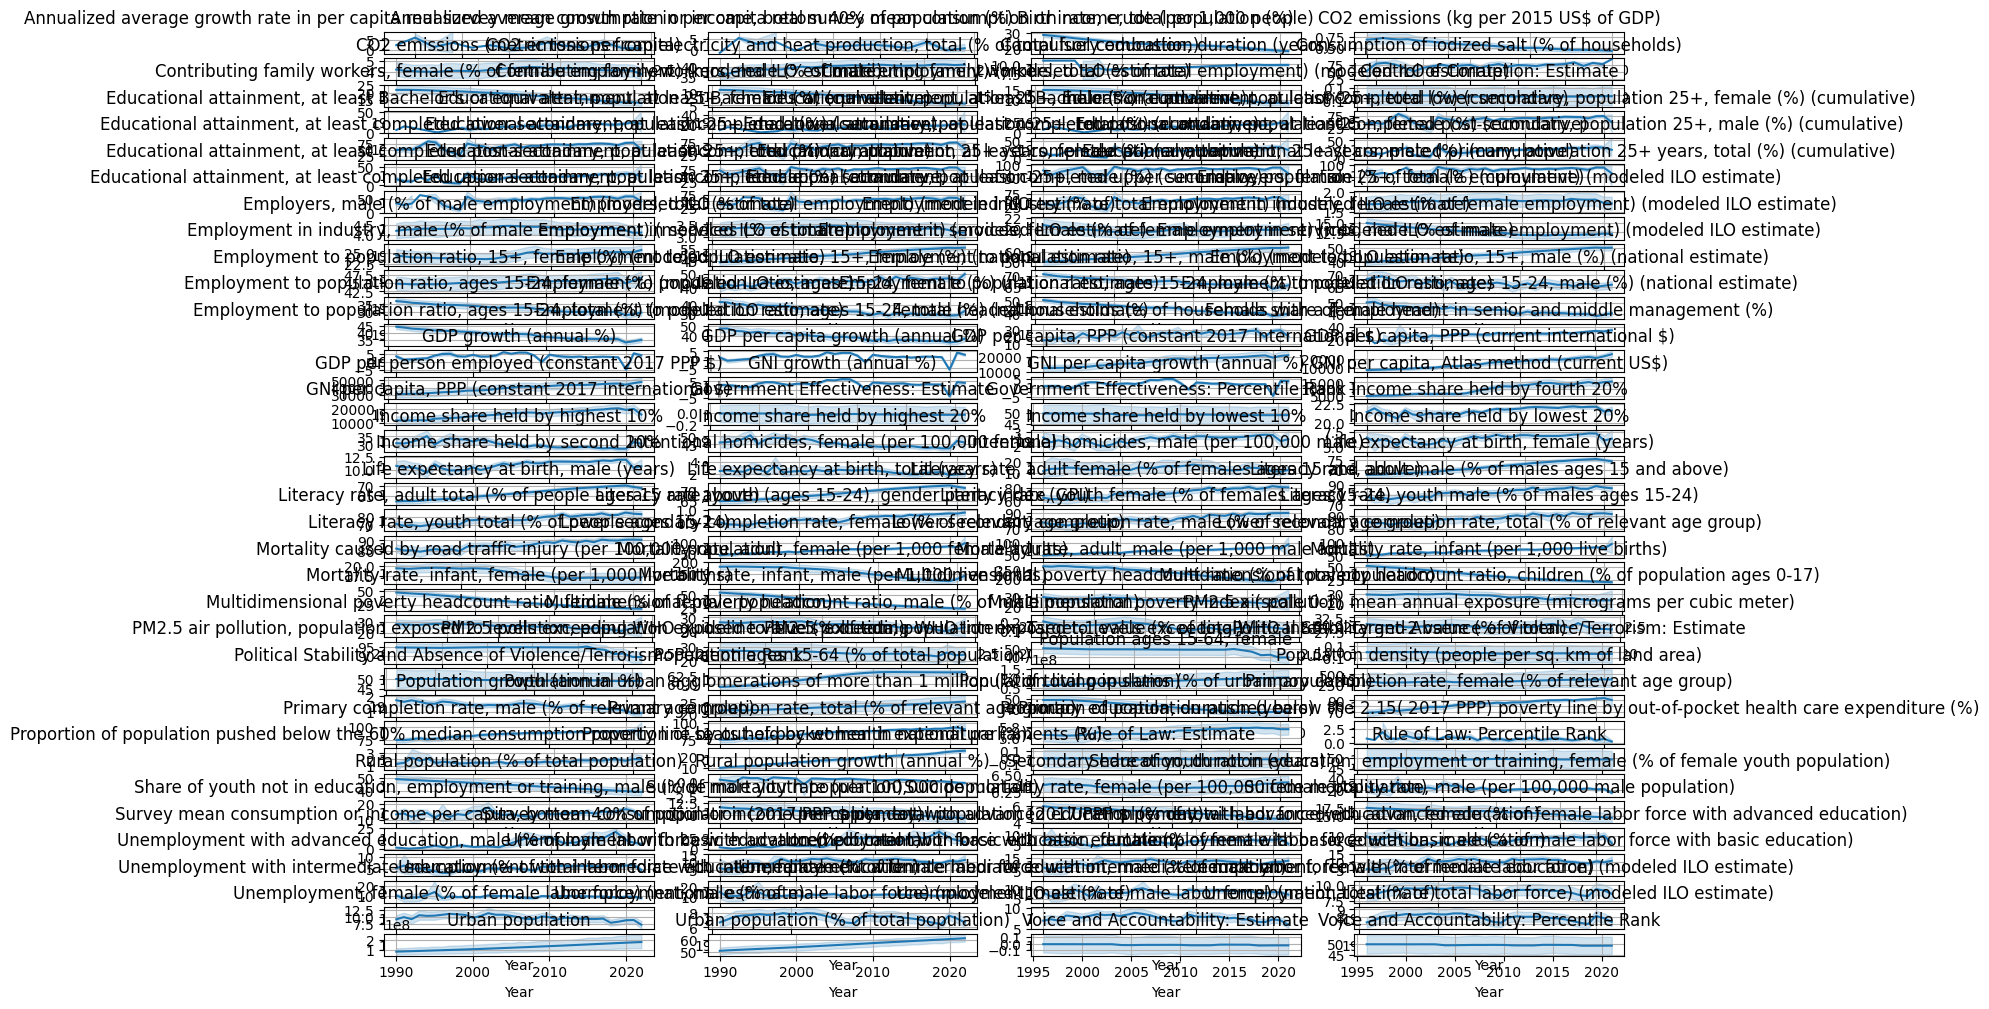

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



df = X_view

# Select the columns you want to plot (exclude 'Year' if it's not relevant)
columns_to_plot = df.columns

# Set the number of columns per row in the matrix plot
columns_per_row = 4  # Adjust this value based on your preference

# Calculate the number of rows required
num_rows = (len(columns_to_plot) - 1) // columns_per_row + 1

# Create subplots
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(16, 12))  # Adjust the figsize as needed

# Iterate through the columns and create time series plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i // columns_per_row, i % columns_per_row]
    sns.lineplot(data=df, x='Year', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Year')
    ax.set_ylabel('')
    ax.grid()

# Adjust the layout
plt.tight_layout()

# Show the matrix of plots
plt.show()


/tmp/ipykernel_32/334508572.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_column_names, rotation=45)  # Rotate the labels for better readability
/tmp/ipykernel_32/334508572.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_column_names, rotation=45)  # Rotate the labels for better readability
/tmp/ipykernel_32/334508572.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_column_names, rotation=45)  # Rotate the labels for better readability
/tmp/ipykernel_32/334508572.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_column_names, rotation=45)  # Rotate the labels for better readability
/tmp/ipykernel_32/334508572.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(short_column_names, rotation=45)  # R

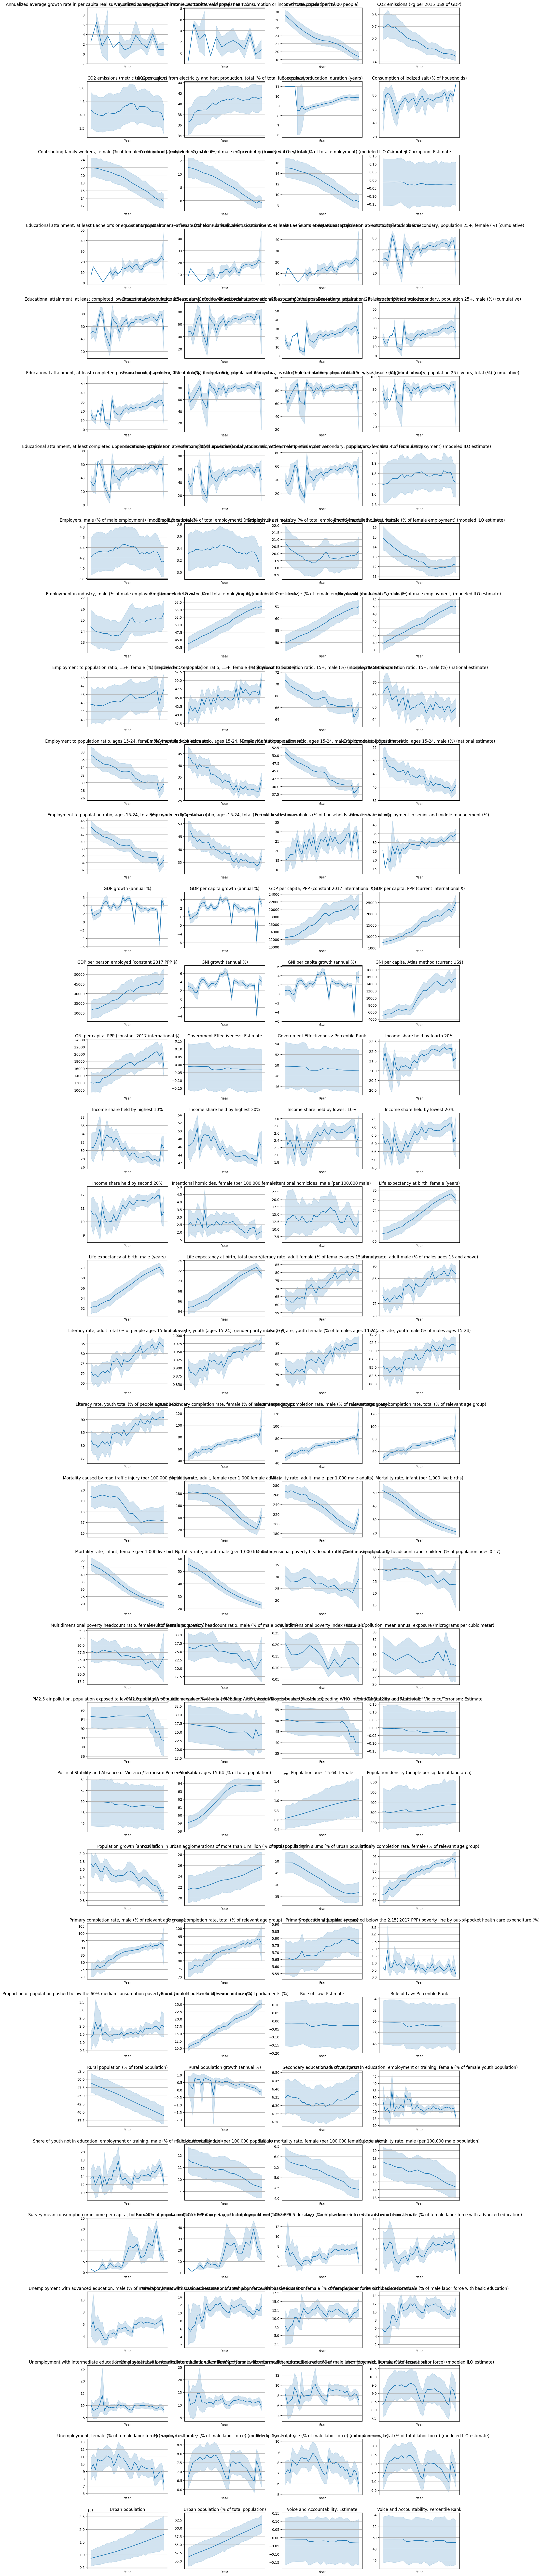

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame with 47 columns (you should replace this with your data)
df = X_view

# Select the columns you want to plot (exclude 'Year' if it's not relevant)
columns_to_plot = df.columns

# Set the number of columns per row in the matrix plot
columns_per_row = 4  # Adjust this value based on your preference

# Calculate the number of rows required
num_rows = (len(columns_to_plot) - 1) // columns_per_row + 1

# Create subplots with a larger figsize
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(16, 3 * num_rows))  # Adjust the height as needed

# Shorten column names for x-axis labels (adjust as needed)
short_column_names = [col[:10] + '...' if len(col) > 10 else col for col in columns_to_plot]

# Iterate through the columns and create time series plots
for i, column in enumerate(columns_to_plot):
    ax = axes[i // columns_per_row, i % columns_per_row]
    sns.lineplot(data=df, x='Year', y=column, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Year')
    ax.set_ylabel('')
    ax.grid()

    # Set shorter column names as x-axis labels
    ax.set_xticklabels(short_column_names, rotation=45)  # Rotate the labels for better readability
    ax.set_xticks([])  # Remove x-axis ticks

# Adjust the layout
plt.tight_layout()

# Show the matrix of plots
plt.show()


In [40]:
# Calculate the percentage of null values by country
null_percentage_by_country = X.isnull().groupby(level='Country Name').mean() * 100

# Display the null percentage by country
print(null_percentage_by_country)

Series Name                  Annualized average growth rate in per capita real survey mean consumption or income, bottom 40% of population (%)  \
Country Name                                                                                                                                     
Afghanistan                                                              100.0                                                                   
Africa Eastern and Southern                                              100.0                                                                   
Africa Western and Central                                               100.0                                                                   
Albania                                                                   98.0                                                                   
Algeria                                                                  100.0                                              

In [41]:
X_new

Series Name        Birth rate, crude (per 1,000 people)  \
Country Name Year                                         
Afghanistan  1990                                51.423   
             1991                                51.788   
             1992                                51.948   
             1993                                52.038   
             1994                                52.174   
...                                                 ...   
Zimbabwe     2018                                32.074   
             2019                                31.518   
             2020                                31.009   
             2021                                30.537   
             2022                                   NaN   

Series Name        CO2 emissions (kg per 2015 US$ of GDP)  \
Country Name Year                                           
Afghanistan  1990                                     NaN   
             1991                                     NaN   
             1992                                     NaN   
             1993                                     NaN   
             1994                                     NaN   
...                                                   ...   
Zimbabwe     2018                                0.502830   
             2019                                0.493927   
             2020                                0.437290   
             2021                                     NaN   
             2022                                     NaN   

Series Name        CO2 emissions (metric tons per capita)  \
Country Name Year                                           
Afghanistan  1990                                0.191389   
             1991                                0.180674   
             1992                                0.126517   
             1993                                0.109106   
             1994                                0.096638   
...                                                   ...   
Zimbabwe     2018                                0.735435   
             2019                                0.663338   
             2020                                0.530484   
             2021                                     NaN   
             2022                                     NaN   

Series Name        CO2 emissions from electricity and heat production, total (% of total fuel combustion)  \
Country Name Year                                                                                           
Afghanistan  1990                                                NaN                                        
             1991                                                NaN                                        
             1992                                                NaN                                        
             1993                                                NaN                                        
             1994                                                NaN                                        
...                                                              ...                                        
Zimbabwe     2018                                                NaN                                        
             2019                                                NaN                                        
             2020                                                NaN                                        
             2021                                                NaN                                        
             2022                                                NaN                                        

Series Name        Compulsory education, duration (years)  \
Country Name Year                                           
Afghanistan  1990                                     NaN   
             1991                          

In [42]:
# # Function to fill null values by interpolation with time for each column
# def fill_null_with_interpolation(group):
#     # Check if all values in the group are empty
#     if group.isna().all().all():
#         # Use the 'World' group to replace all null values
#         return group.fillna(df.xs('World', level='Country Name'))
#     else:
#         print(group)
#         print('end')
#         # Interpolate null values within the group
#         return group.interpolate()

# # Apply the function to each group (country)
# filled_X = X_new.apply(fill_null_with_interpolation, axis=0)





In [43]:
# df_filled.loc['Afghanistan']['CO2 emissions (kg per 2015 US$ of GDP)']

In [44]:
import pandas as pd
import numpy as np
from scipy import interpolate

def fillna_interpolate_by_country(df, method='linear'):
    """Fills null values in a DataFrame using interpolate function with a specified method for each group of the same country name.

    Args:
        df: A pandas DataFrame with a MultiIndex containing 'Country Name' and 'Year'.
        method: The interpolation method to use ('linear', 'time', 'spline', etc.).

    Returns:
        A pandas DataFrame with null values filled by interpolating within each country group using the specified method.
    """

    # Create a copy of the DataFrame
    df_filled = df.copy()

    # Group the DataFrame by 'Country Name' and interpolate within each group using the specified method
    for country_name, group in df_filled.groupby(level='Country Name'):
        if method == 'linear':
            group.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
        elif method == 'time':
            group.interpolate(method='time', limit_direction='both', axis=0, inplace=True)
        elif method == 'spline':
            x = group.index.get_level_values('Year')
            for column in group.columns:
                y = group[column]
                mask = ~y.isnull()
                if mask.sum() >= 2:  # Require at least 2 data points for spline interpolation
                    f = interpolate.interp1d(x[mask], y[mask], kind='slinear', fill_value='extrapolate')
                    y[~mask] = f(x[~mask])
        # Assign the modified group back to the DataFrame
        df_filled.loc[country_name] = group

    return df_filled

def fill_null_with_country_and_world(df):
    """Fills null values in a DataFrame using the 'Country Name' and 'World' values for each column.

    Args:
        df: A pandas DataFrame.

    Returns:
        A pandas DataFrame with null values filled using 'Country Name' and 'World'.
    """

    df_filled = df.copy()

    for column in df_filled.columns:
        for country_name, year in df_filled.index:
            if pd.isna(df_filled.loc[(country_name, year), column]):
                country_value = df_filled.loc[(country_name, year), (column)]
                if (year in df_filled.loc['World'].index.get_level_values('Year')):
                    world_value = df_filled.loc[('World', year), column]
                    if pd.notna(world_value):
                        df_filled.loc[(country_name, year), column] = world_value
    return df_filled

def fill_null_with_median(df):
    """Fills null values in a DataFrame using the median of non-null values in each column.

    Args:
        df: A pandas DataFrame.

    Returns:
        A pandas DataFrame with null values filled using the column median.
    """

    df_filled = df.copy()

    for column in df_filled.columns:
        median = df_filled[column].median()
        df_filled[column].fillna(median, inplace=True)

    return df_filled




# Specify the interpolation method (e.g., 'linear', 'time', 'spline')
interpolation_method = 'spline'
dataf=X_new.copy()
dataf['Intentional homicides (per 100,000 people)']=y_new



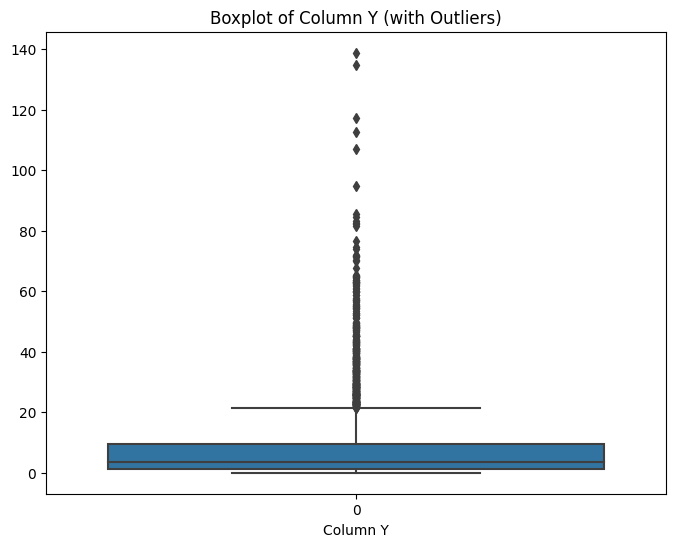

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'y' is the column name containing outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y_new)
plt.title('Boxplot of Column Y (with Outliers)')
plt.xlabel('Column Y')
plt.show()


In [46]:
y_new.describe()

count    4209.000000
mean        8.035708
std        12.026623
min         0.000000
25%         1.348194
50%         3.428468
75%         9.402278
max       138.773986
Name: Intentional homicides (per 100,000 people), dtype: float64

In [47]:
import pandas as pd

# Assuming 'x' is your DataFrame with x columns and 'y' is your DataFrame with y column

# Calculate the percentage of outliers for each x column
outliers_percentage_x = {}

# Calculate the percentage of outliers for the y column
Q1_y = y_new.quantile(0.25)
Q3_y = y_new.quantile(0.75)
IQR_y = Q3_y - Q1_y

upper_limit_y = Q3_y + 1.5 * IQR_y
outliers_percentage_y = (y_new > upper_limit_y).sum() / len(y_new) * 100



# Display the percentage of outliers for the y column
print(f"Percentage of Outliers for Y column: {outliers_percentage_y:.2f}%")

Percentage of Outliers for Y column: 4.76%


In [48]:
import pandas as pd

# Assuming 'dataf' is your combined DataFrame with both x and y columns

# Calculate the percentage of outliers for each column in 'dataf'
outliers_percentage = {}
for col in dataf.columns:
    Q1 = dataf[col].quantile(0.25)
    Q3 = dataf[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    outliers_percentage[col] = (dataf[col] > upper_limit).sum() / len(dataf) * 100

# Display the percentage of outliers for each column
print("Percentage of Outliers for each column:")
for col, percentage in outliers_percentage.items():
    print(f"{col}: {percentage:.2f}%")

# Replace outliers for each column using the IQR method
for col in dataf.columns:
    Q1 = dataf[col].quantile(0.25)
    Q3 = dataf[col].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_limit = Q3 + 1.5 * IQR
    dataf[col] = dataf[col].clip(upper=upper_limit)

# Show the modified DataFrame
print("Modified DataFrame:")
print(dataf)


Percentage of Outliers for each column:
Birth rate, crude (per 1,000 people): 0.00%
CO2 emissions (kg per 2015 US$ of GDP): 4.84%
CO2 emissions (metric tons per capita): 3.94%
CO2 emissions from electricity and heat production, total (% of total fuel combustion): 0.27%
Compulsory education, duration (years): 5.12%
Contributing family workers, female (% of female employment) (modeled ILO estimate): 0.27%
Contributing family workers, male (% of male employment) (modeled ILO estimate): 2.55%
Contributing family workers, total (% of total employment) (modeled ILO estimate): 0.90%
Control of Corruption: Estimate: 0.00%
Employers, female (% of female employment) (modeled ILO estimate): 2.89%
Employers, male (% of male employment) (modeled ILO estimate): 1.71%
Employers, total (% of total employment) (modeled ILO estimate): 2.04%
Employment in industry (% of total employment) (modeled ILO estimate): 0.39%
Employment in industry, female (% of female employment) (modeled ILO estimate): 1.86%
Em

In [49]:
# dataf=dataf.dropna(subset=['Intentional homicides (per 100,000 people)'])

# Fill null values within each country group using the specified method
df_filled = fillna_interpolate_by_country(dataf, method=interpolation_method)

# Fill null values using 'Country Name' and 'World'
df_filled = fill_null_with_country_and_world(df_filled)

# Fill remaining null values using column medians
df_filled = fill_null_with_median(df_filled)

# Print the filled DataFrame
print(df_filled)

Series Name        Birth rate, crude (per 1,000 people)  \
Country Name Year                                         
Afghanistan  1990                                51.423   
             1991                                51.788   
             1992                                51.948   
             1993                                52.038   
             1994                                52.174   
...                                                 ...   
Zimbabwe     2018                                32.074   
             2019                                31.518   
             2020                                31.009   
             2021                                30.537   
             2022                                30.065   

Series Name        CO2 emissions (kg per 2015 US$ of GDP)  \
Country Name Year                                           
Afghanistan  1990                                0.001442   
             1991                                

In [50]:
X = df_filled.drop(columns=['Intentional homicides (per 100,000 people)'])  # Features
y = df_filled['Intentional homicides (per 100,000 people)']  # Target variable



In [51]:
null_percentage = (df_filled.isnull().sum() / len(new_x)) * 100
# Sort the null_percentage Series in descending order
sorted_null_percentage = null_percentage.sort_values(ascending=False)

# Display the percentage of null values for each column in descending order
print(sorted_null_percentage.describe())

count    83.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64


In [52]:
df_filled


Series Name        Birth rate, crude (per 1,000 people)  \
Country Name Year                                         
Afghanistan  1990                                51.423   
             1991                                51.788   
             1992                                51.948   
             1993                                52.038   
             1994                                52.174   
...                                                 ...   
Zimbabwe     2018                                32.074   
             2019                                31.518   
             2020                                31.009   
             2021                                30.537   
             2022                                30.065   

Series Name        CO2 emissions (kg per 2015 US$ of GDP)  \
Country Name Year                                           
Afghanistan  1990                                0.001442   
             1991                                0.016798   
             1992                                0.032153   
             1993                                0.047508   
             1994                                0.062863   
...                                                   ...   
Zimbabwe     2018                                0.502830   
             2019                                0.493927   
             2020                                0.437290   
             2021                                0.380653   
             2022                                0.324016   

Series Name        CO2 emissions (metric tons per capita)  \
Country Name Year                                           
Afghanistan  1990                                0.191389   
             1991                                0.180674   
             1992                                0.126517   
             1993                                0.109106   
             1994                                0.096638   
...                                                   ...   
Zimbabwe     2018                                0.735435   
             2019                                0.663338   
             2020                                0.530484   
             2021                                0.397629   
             2022                                0.264774   

Series Name        CO2 emissions from electricity and heat production, total (% of total fuel combustion)  \
Country Name Year                                                                                           
Afghanistan  1990                                          43.316948                                        
             1991                                          43.762197                                        
             1992                                          44.811062                                        
             1993                                          44.791374                                        
             1994                                          45.102834                                        
...                                                              ...                                        
Zimbabwe     2018                                          66.602725                                        
             2019                                          68.392657                                        
             2020                                          70.182590                                        
             2021                                          71.972523                                        
             2022                                          73.762455                                        

Series Name        Compulsory education, duration (years)  \
Country Name Year                                           
Afghanistan  1990                                     6.0   
             1991                          

In [53]:
df_filled['GDP per person employed (constant 2017 PPP $)']

Country Name  Year
Afghanistan   1990    5407.420973
              1991    5452.431894
              1992    5497.442816
              1993    5542.453737
              1994    5587.464658
                         ...     
Zimbabwe      2018    6715.271526
              2019    6177.275281
              2020    5635.593722
              2021    5934.427280
              2022    5936.674990
Name: GDP per person employed (constant 2017 PPP $), Length: 8778, dtype: float64

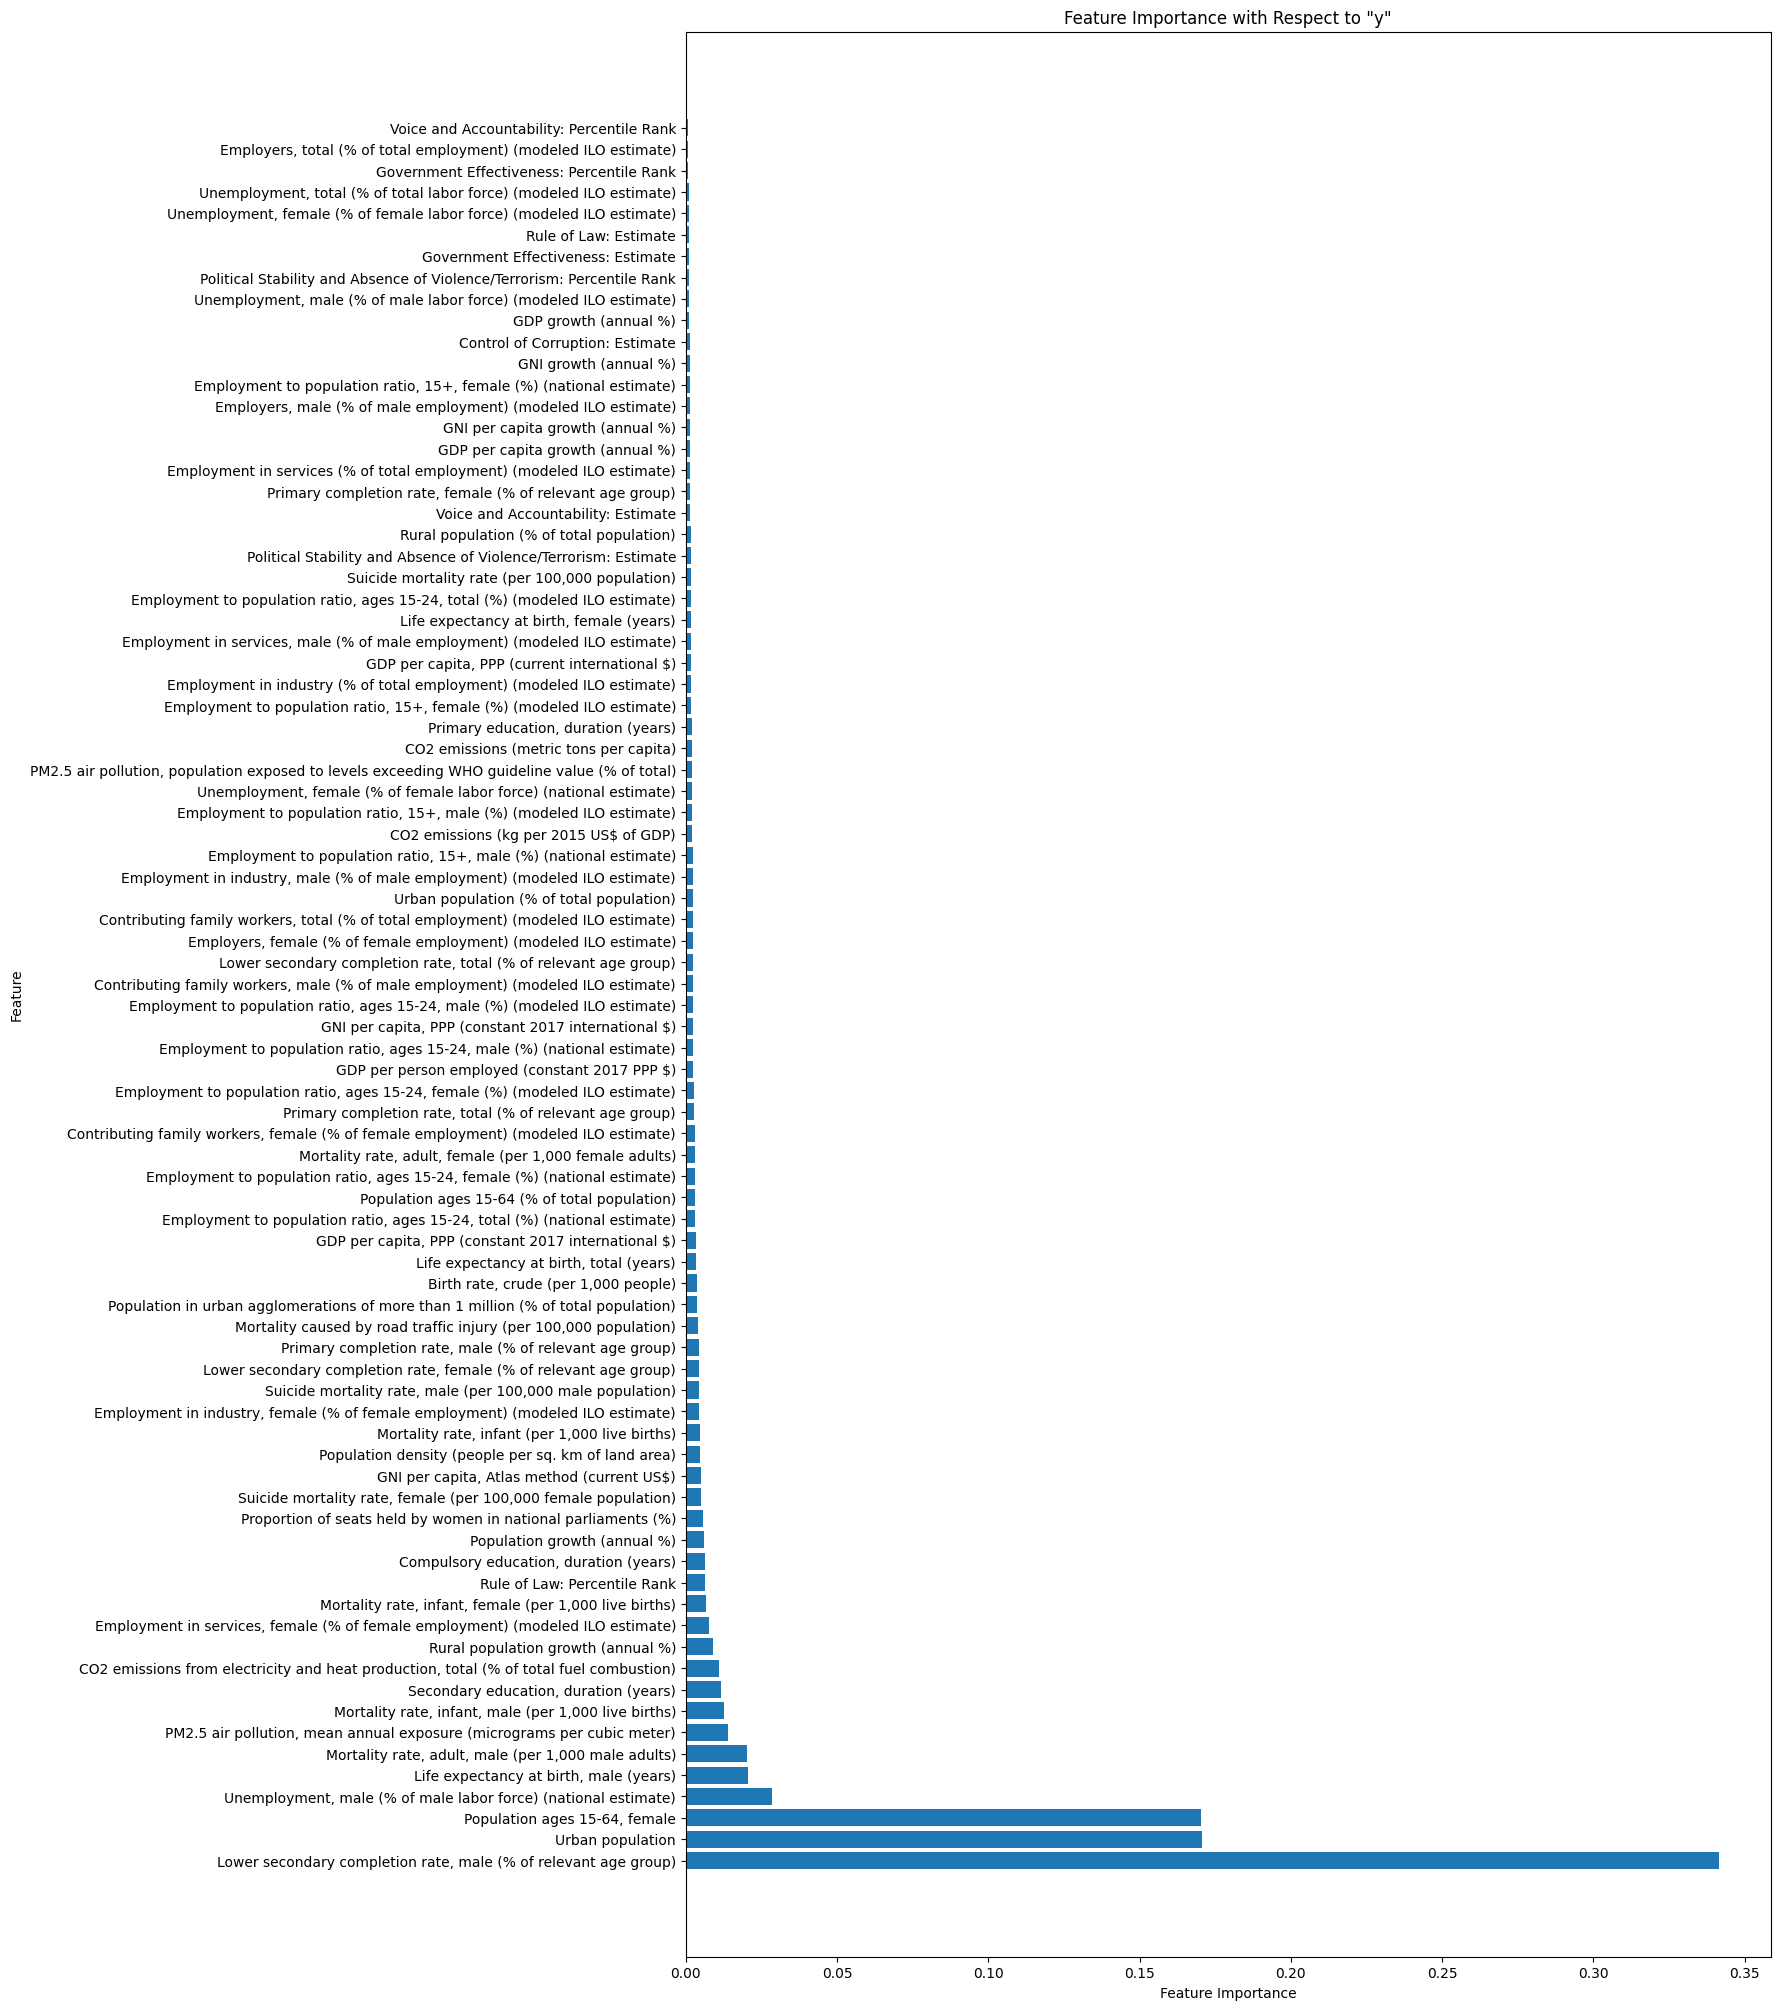

In [54]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Create a random forest regressor
regr = RandomForestRegressor()

# Fit the model to the data
regr.fit(X, y)  # X should be your feature data, and y is the target variable

# Get feature importances
feature_importances = regr.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Increase the plot size for better visibility
plt.figure(figsize=(14, 25
                   
                   ))  # Adjust the width and height as needed

# Plot feature importance
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance with Respect to "y"')

plt.show()

In [55]:
world_bank_data['Series Name'].nunique()

143

In [56]:

# Select the top 40 features
top_features = feature_importance_df.head(40)['Feature'].tolist()

# Use only the selected top features in your X matrix
X_selected = X[top_features]

# Print the selected features
print("Top 40 Features:", top_features)

Top 40 Features: ['Lower secondary completion rate, male (% of relevant age group)', 'Urban population', 'Population ages 15-64, female', 'Unemployment, male (% of male labor force) (national estimate)', 'Life expectancy at birth, male (years)', 'Mortality rate, adult, male (per 1,000 male adults)', 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Mortality rate, infant, male (per 1,000 live births)', 'Secondary education, duration (years)', 'CO2 emissions from electricity and heat production, total (% of total fuel combustion)', 'Rural population growth (annual %)', 'Employment in services, female (% of female employment) (modeled ILO estimate)', 'Mortality rate, infant, female (per 1,000 live births)', 'Rule of Law: Percentile Rank', 'Compulsory education, duration (years)', 'Population growth (annual %)', 'Proportion of seats held by women in national parliaments (%)', 'Suicide mortality rate, female (per 100,000 female population)', 'GNI per capita, Atlas 

In [57]:
 
X_selected=X_selected.drop(columns='Compulsory education, duration (years)')

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
# Standardize the features (important for VIF calculation)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Print the VIF values
print(vif_data)

                                              Feature            VIF
0   Lower secondary completion rate, male (% of re...       2.000978
1                                    Urban population      16.894882
2                       Population ages 15-64, female      16.724983
3   Unemployment, male (% of male labor force) (na...       1.224206
4              Life expectancy at birth, male (years)     644.533396
5   Mortality rate, adult, male (per 1,000 male ad...      57.305473
6   PM2.5 air pollution, mean annual exposure (mic...       2.365606
7   Mortality rate, infant, male (per 1,000 live b...   32415.273057
8               Secondary education, duration (years)       1.269088
9   CO2 emissions from electricity and heat produc...       1.253535
10                 Rural population growth (annual %)       1.184087
11  Employment in services, female (% of female em...       5.933780
12  Mortality rate, infant, female (per 1,000 live...   21317.734937
13                       Rule of L

In [59]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Assuming X_selected is your feature matrix
# Replace this with your actual data

# Function to calculate VIF for each feature
def calculate_vif(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

# Function to remove features with high VIF
def remove_high_vif_features(X, threshold=5):
    while True:
        vif_data = calculate_vif(X)
        max_vif_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Feature']
        if vif_data['VIF'].max() > threshold:
            X = X.drop(columns=max_vif_feature)
        else:
            break
    return X

# Remove features with high VIF
X_selected_no_high_vif = remove_high_vif_features(X_selected)

# Print the resulting feature matrix
print(X_selected_no_high_vif)


Series Name        Lower secondary completion rate, male (% of relevant age group)  \
Country Name Year                                                                    
Afghanistan  1990                                          25.982988                 
             1991                                          25.762302                 
             1992                                          25.541616                 
             1993                                          25.320930                 
             1994                                          25.100245                 
...                                                              ...                 
Zimbabwe     2018                                          63.796570                 
             2019                                          71.084419                 
             2020                                          68.930794                 
             2021                                     

In [60]:
X_selected_no_high_vif.columns

Index(['Lower secondary completion rate, male (% of relevant age group)',
       'Population ages 15-64, female',
       'Unemployment, male (% of male labor force) (national estimate)',
       'Mortality rate, adult, male (per 1,000 male adults)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'Secondary education, duration (years)',
       'CO2 emissions from electricity and heat production, total (% of total fuel combustion)',
       'Rural population growth (annual %)',
       'Mortality rate, infant, female (per 1,000 live births)',
       'Rule of Law: Percentile Rank', 'Population growth (annual %)',
       'Proportion of seats held by women in national parliaments (%)',
       'Suicide mortality rate, female (per 100,000 female population)',
       'GNI per capita, Atlas method (current US$)',
       'Population density (people per sq. km of land area)',
       'Employment in industry, female (% of female employment) (modeled ILO estimat

In [61]:
X_selected_no_high_vif=X_selected_no_high_vif.drop(columns=['Suicide mortality rate, female (per 100,000 female population)','Suicide mortality rate, male (per 100,000 male population)'])

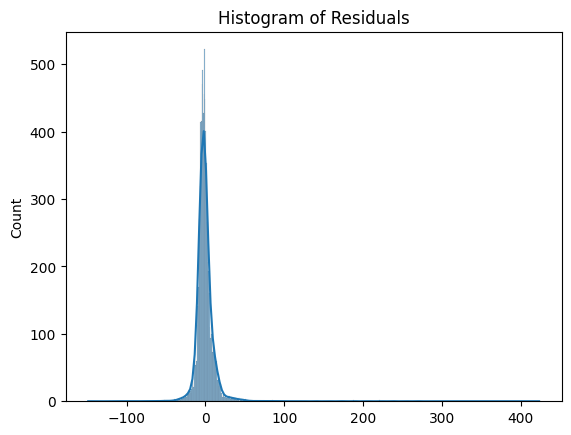

In [62]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_selected_no_high_vif is your feature matrix

# Assuming y is your target variable

# Fit the linear regression model
X_selected_no_high_vif_ = sm.add_constant(X_selected_no_high_vif)  # Adding a constant term
model = sm.OLS(y, X_selected_no_high_vif_).fit()

# Check for normality of residuals
residuals = model.resid
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()




In [63]:
X_selected_no_high_vif

Series Name        Lower secondary completion rate, male (% of relevant age group)  \
Country Name Year                                                                    
Afghanistan  1990                                          25.982988                 
             1991                                          25.762302                 
             1992                                          25.541616                 
             1993                                          25.320930                 
             1994                                          25.100245                 
...                                                              ...                 
Zimbabwe     2018                                          63.796570                 
             2019                                          71.084419                 
             2020                                          68.930794                 
             2021                                          58.507046                 
             2022                                          48.083298                 

Series Name        Population ages 15-64, female  \
Country Name Year                                  
Afghanistan  1990                      2728925.0   
             1991                      2734246.0   
             1992                      3058461.0   
             1993                      3537687.0   
             1994                      3884337.0   
...                                          ...   
Zimbabwe     2018                      4511959.0   
             2019                      4621723.0   
             2020                      4735472.0   
             2021                      4852267.0   
             2022                      4971664.0   

Series Name        Unemployment, male (% of male labor force) (national estimate)  \
Country Name Year                                                                   
Afghanistan  1990                                             8.4550                
             1991                                             8.1325                
             1992                                             7.8100                
             1993                                             7.4875                
             1994                                             7.1650                
...                                                              ...                
Zimbabwe     2018                                             7.0800                
             2019                                             7.7600                
             2020                                             8.4950                
             2021                                             9.2300                
             2022                                             9.9650                

Series Name        Mortality rate, adult, male (per 1,000 male adults)  \
Country Name Year                                                        
Afghanistan  1990                                            510.052     
             1991                                            502.877     
             1992                                            499.627     
             1993                                            393.724     
             1994                                            422.588     
...                                                              ...     
Zimbabwe     2018                                            391.373     
             2019                                            400.483     
             2020                                            412.647     
             2021                                            456.323     
             2022                                            499.999     

Series Name        PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
Country Name Year                         

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


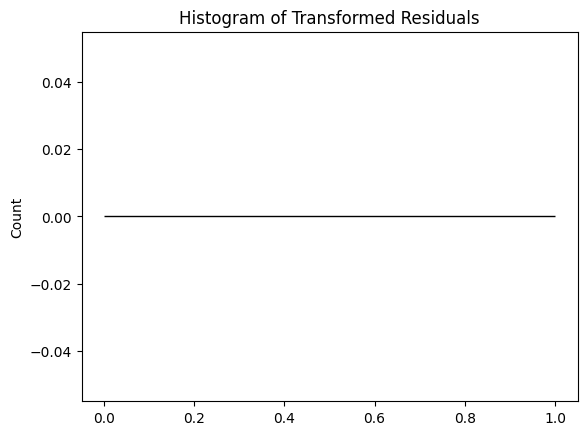

Original Model:
                                        OLS Regression Results                                        
Dep. Variable:     Intentional homicides (per 100,000 people)   R-squared:                       0.067
Model:                                                    OLS   Adj. R-squared:                  0.064
Method:                                         Least Squares   F-statistic:                     25.12
Date:                                        Tue, 12 Dec 2023   Prob (F-statistic):          3.79e-112
Time:                                                07:43:35   Log-Likelihood:                -38716.
No. Observations:                                        8778   AIC:                         7.748e+04
Df Residuals:                                            8752   BIC:                         7.767e+04
Df Model:                                                  25                                         
Covariance Type:                                    nonro

In [64]:
# If residuals are not normally distributed, you can try transforming the target variable
# For example, using the natural logarithm
y_transformed = np.log1p(y)

# Fit the linear regression model on transformed data
model_transformed = sm.OLS(y_transformed, X_selected_no_high_vif_).fit()

# Check for normality of transformed residuals
residuals_transformed = model_transformed.resid
sns.histplot(residuals_transformed, kde=True)
plt.title('Histogram of Transformed Residuals')
plt.show()

# Print the summary of the original and transformed models
print("Original Model:")
print(model.summary())

print("\nTransformed Model:")
print(model_transformed.summary())

In [65]:
X_selected_no_high_vif

Series Name        Lower secondary completion rate, male (% of relevant age group)  \
Country Name Year                                                                    
Afghanistan  1990                                          25.982988                 
             1991                                          25.762302                 
             1992                                          25.541616                 
             1993                                          25.320930                 
             1994                                          25.100245                 
...                                                              ...                 
Zimbabwe     2018                                          63.796570                 
             2019                                          71.084419                 
             2020                                          68.930794                 
             2021                                          58.507046                 
             2022                                          48.083298                 

Series Name        Population ages 15-64, female  \
Country Name Year                                  
Afghanistan  1990                      2728925.0   
             1991                      2734246.0   
             1992                      3058461.0   
             1993                      3537687.0   
             1994                      3884337.0   
...                                          ...   
Zimbabwe     2018                      4511959.0   
             2019                      4621723.0   
             2020                      4735472.0   
             2021                      4852267.0   
             2022                      4971664.0   

Series Name        Unemployment, male (% of male labor force) (national estimate)  \
Country Name Year                                                                   
Afghanistan  1990                                             8.4550                
             1991                                             8.1325                
             1992                                             7.8100                
             1993                                             7.4875                
             1994                                             7.1650                
...                                                              ...                
Zimbabwe     2018                                             7.0800                
             2019                                             7.7600                
             2020                                             8.4950                
             2021                                             9.2300                
             2022                                             9.9650                

Series Name        Mortality rate, adult, male (per 1,000 male adults)  \
Country Name Year                                                        
Afghanistan  1990                                            510.052     
             1991                                            502.877     
             1992                                            499.627     
             1993                                            393.724     
             1994                                            422.588     
...                                                              ...     
Zimbabwe     2018                                            391.373     
             2019                                            400.483     
             2020                                            412.647     
             2021                                            456.323     
             2022                                            499.999     

Series Name        PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)  \
Country Name Year                         

In [66]:

from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Assuming X is your feature matrix and y is the target variable
# Replace this with your actual data
X_selected_no_high_vif 


# Create a linear regression model
model = LinearRegression()

# Fit the model to your data
model.fit(X_selected_no_high_vif, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)



Coefficients: [ 5.75962908e-02  1.01911970e-07  8.13538793e-02  8.05480750e-03
 -1.70190247e-01 -1.41921417e+00  3.28873102e-02 -1.22700990e-04
  1.56598813e-01  7.50894411e-02  5.31048182e-01 -3.94428437e-02
 -1.85444723e-04 -4.32481787e-03  1.72354099e-02  1.22077509e-02
 -4.43283978e-02  6.36819660e-02  2.14809555e-02  3.01652841e-01
  1.04933321e-02 -2.18576288e-02 -4.79080336e-02 -5.89599169e-05
 -8.44601578e-03]
Intercept: -7.194908413148278


In [67]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X_selected_no_high_vif and y are your feature matrix and target variable respectively

# Make predictions using the model
predictions = model.predict(X_selected_no_high_vif)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared
r2 = r2_score(y, predictions)
print("R-squared:", r2)


Mean Squared Error (MSE): 396.71204752988723
R-squared: 0.06694012025155649


In [68]:
X_selected_no_high_vif.iloc[1,:].values

array([ 2.57623021e+01,  2.73424600e+06,  8.13250000e+00,  5.02877000e+02,
        4.91388967e+01,  6.00000000e+00,  4.37621965e+01,  3.56908546e-01,
        1.04254612e+02,  2.76382029e-01,  4.69880407e-01,  2.73092369e+01,
       -6.20000000e+02,  1.64745059e+01,  1.18093700e+01,  9.80903800e+00,
        3.49747309e+01,  1.11000000e+01,  1.50644192e+01,  5.01109894e+01,
        1.23680000e+02,  7.75592138e+01,  1.20820000e+01,  5.45243189e+03,
        1.02075000e+02])

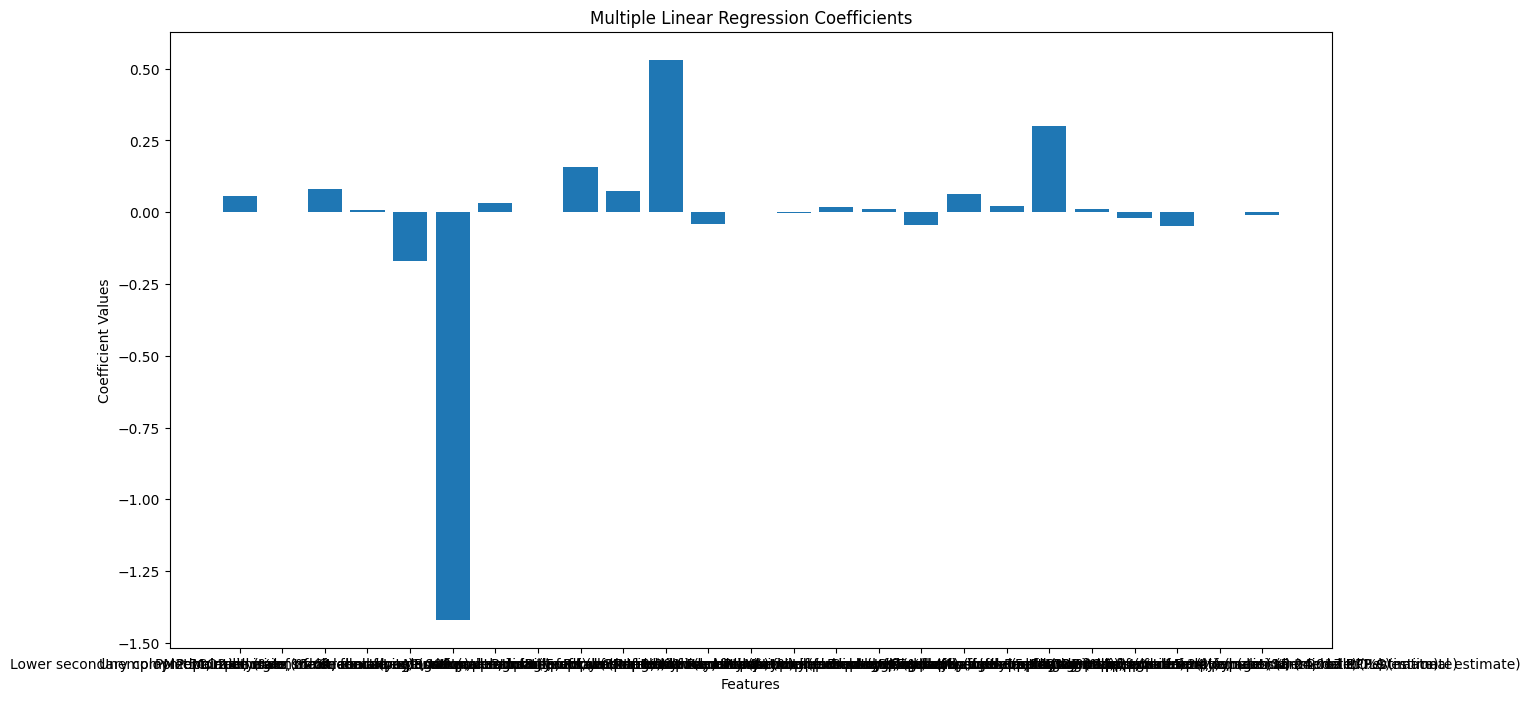

In [69]:
import matplotlib.pyplot as plt

# Plot the coefficients
plt.figure(figsize=(15, 8))  # Adjust the figsize as needed
plt.bar(X_selected_no_high_vif.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Values')
plt.title('Multiple Linear Regression Coefficients')
plt.show()


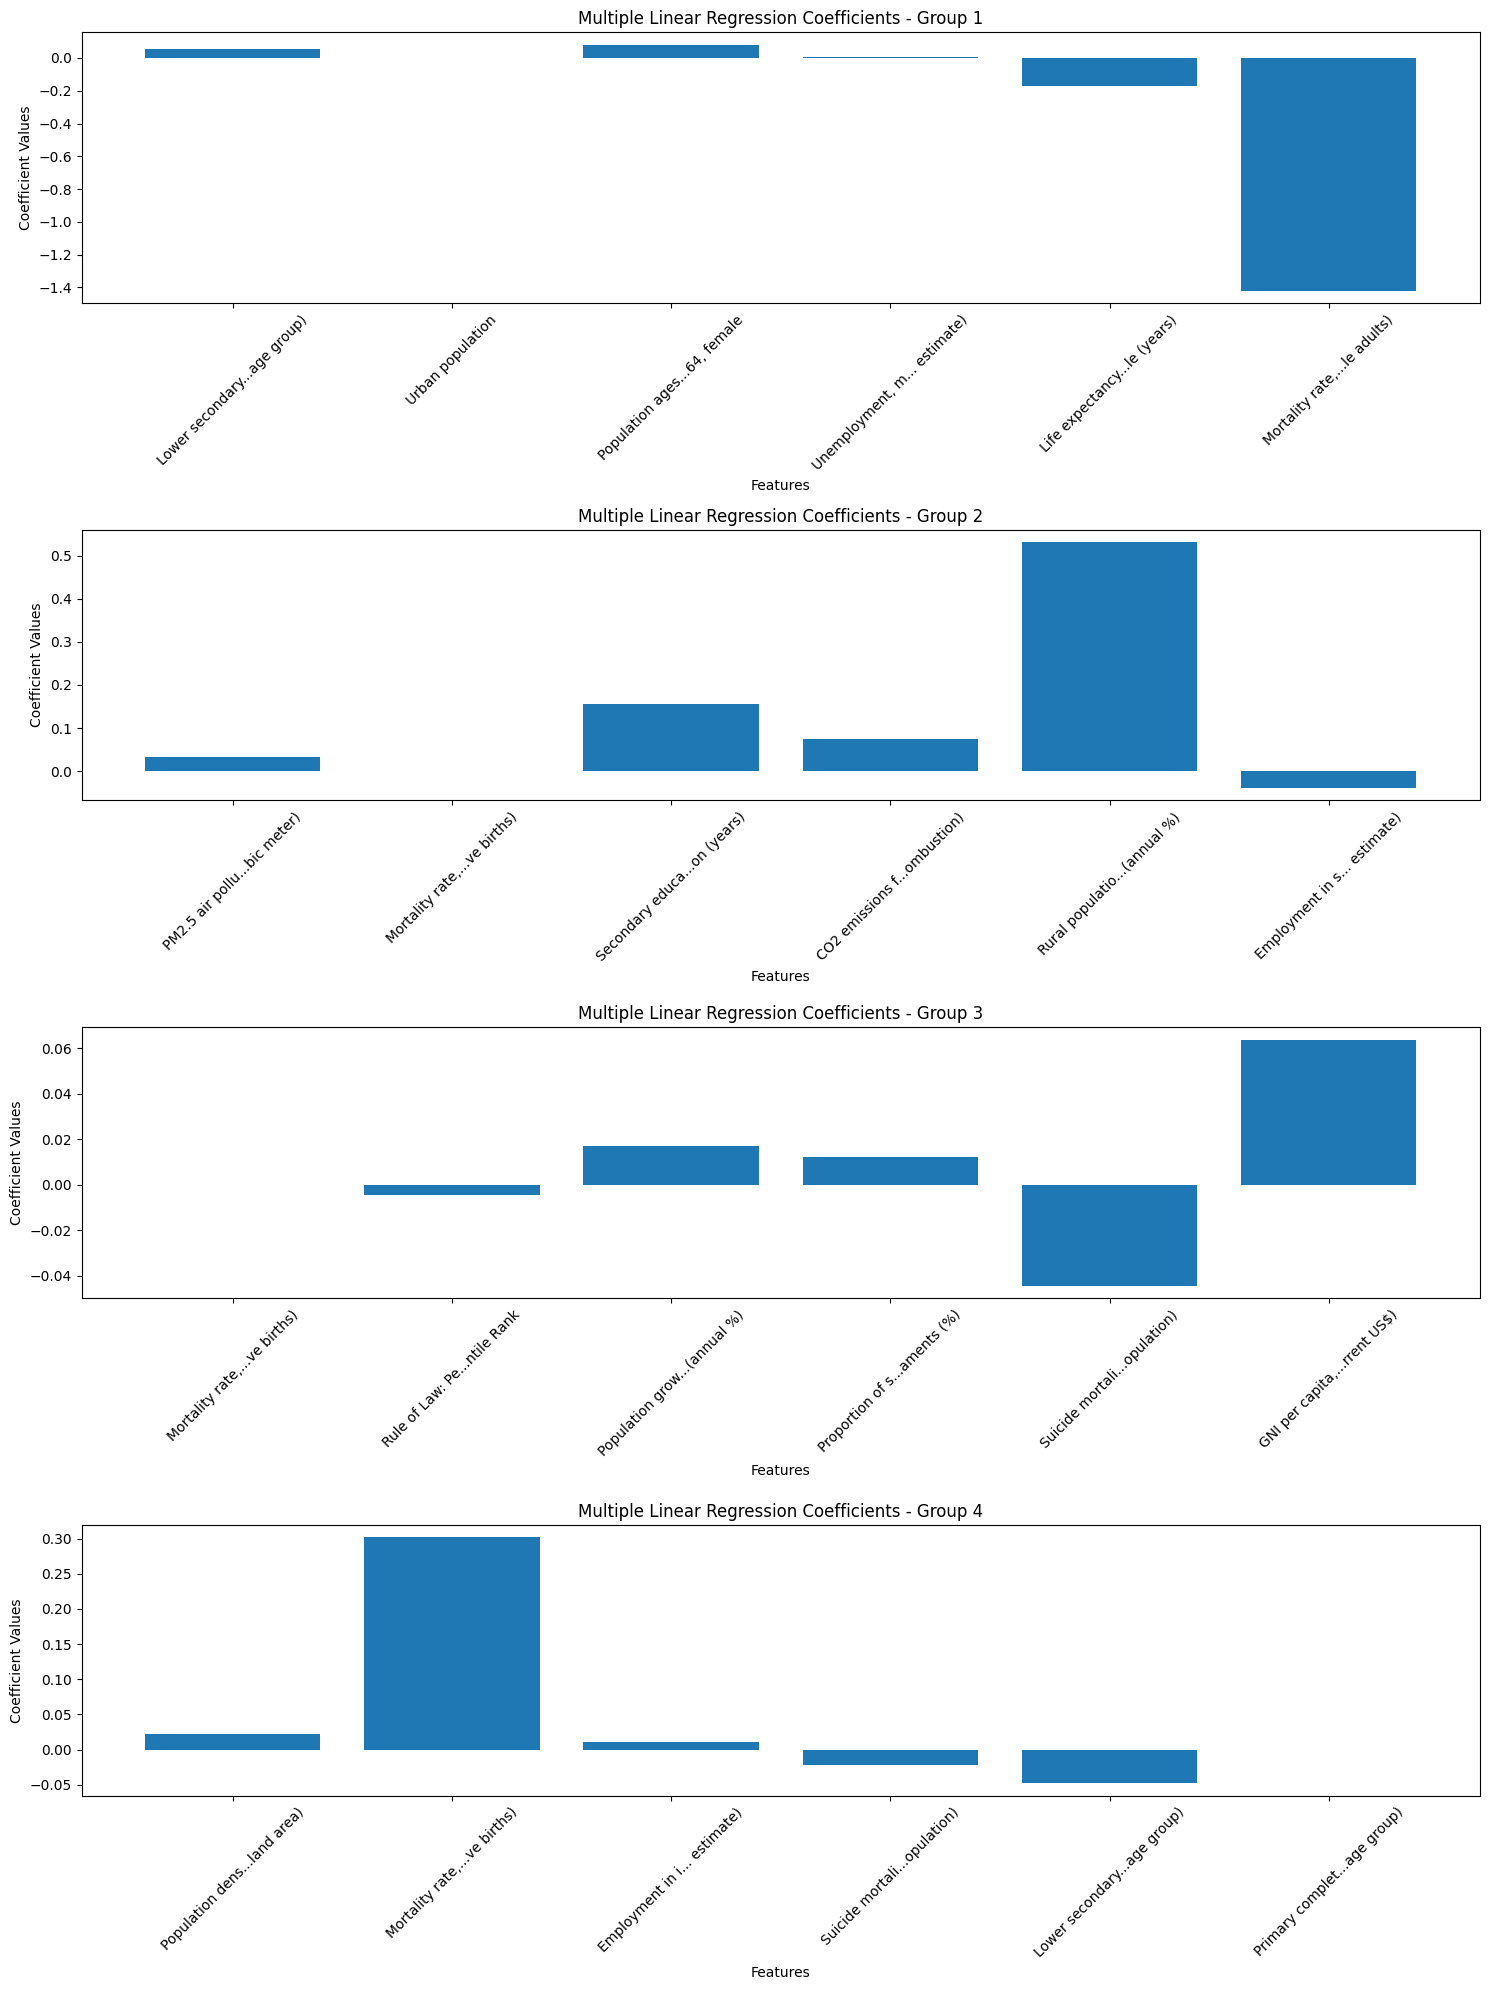

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have 40 features in X_selected
num_features = len(X_selected_no_high_vif.columns)
num_subplots = 4
features_per_subplot = num_features // num_subplots

# Create subplots
fig, axes = plt.subplots(num_subplots, figsize=(15, 20))

# Abbreviate column names
abbreviated_column_names = [col[:15] + '...' + col[-10:] if len(col) > 25 else col for col in X_selected.columns]

# Plot coefficients for each subplot
for i in range(num_subplots):
    start_idx = i * features_per_subplot
    end_idx = (i + 1) * features_per_subplot
    subset_features = X_selected_no_high_vif.columns[start_idx:end_idx]
    
    axes[i].bar(abbreviated_column_names[start_idx:end_idx], coefficients[start_idx:end_idx])
    axes[i].set_xlabel('Features')
    axes[i].set_ylabel('Coefficient Values')
    axes[i].set_title(f'Multiple Linear Regression Coefficients - Group {i+1}')
    axes[i].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


In [71]:
# Get the coefficients and corresponding features
coefficients = model.coef_
features = X_selected_no_high_vif.columns  # Assuming X_selected_no_high_vif is your feature matrix after removing features with high VIF

# Combine coefficients and features into a DataFrame
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort the DataFrame by absolute values of coefficients in descending order
sorted_coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Print the sorted coefficients
print("Sorted Coefficients:")
print(sorted_coefficients_df)


Sorted Coefficients:
                                              Feature   Coefficient
5               Secondary education, duration (years) -1.419214e+00
10                       Population growth (annual %)  5.310482e-01
19      Population ages 15-64 (% of total population)  3.016528e-01
4   PM2.5 air pollution, mean annual exposure (mic... -1.701902e-01
8   Mortality rate, infant, female (per 1,000 live...  1.565988e-01
2   Unemployment, male (% of male labor force) (na...  8.135388e-02
9                        Rule of Law: Percentile Rank  7.508944e-02
17  Mortality caused by road traffic injury (per 1...  6.368197e-02
0   Lower secondary completion rate, male (% of re...  5.759629e-02
22  Employment to population ratio, ages 15-24, fe... -4.790803e-02
16  Primary completion rate, male (% of relevant a... -4.432840e-02
11  Proportion of seats held by women in national ... -3.944284e-02
6   CO2 emissions from electricity and heat produc...  3.288731e-02
21  Contributing family wor

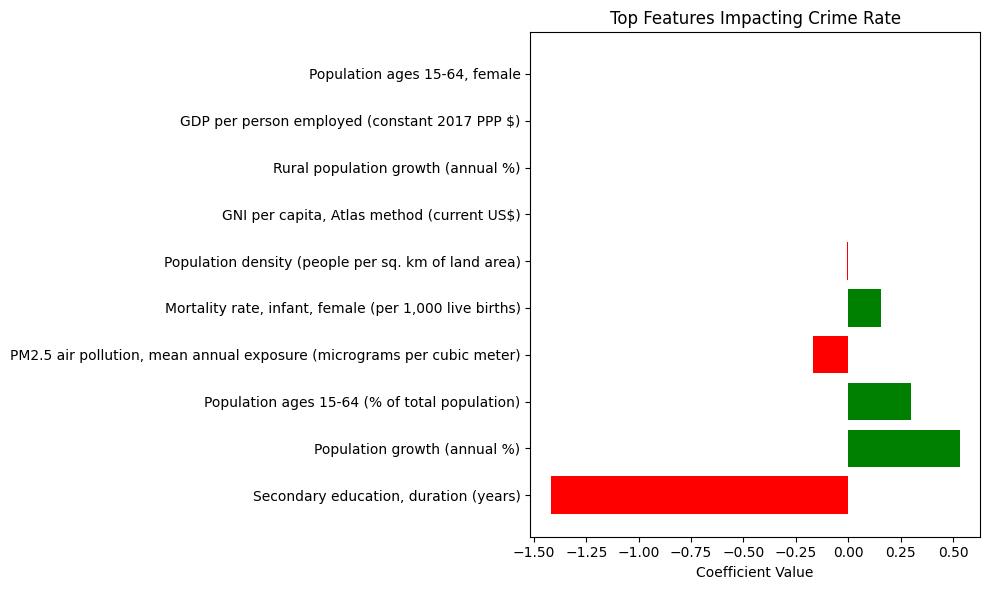

In [72]:
import matplotlib.pyplot as plt

# Assuming sorted_coefficients_df contains the sorted coefficients DataFrame

# Selecting top positive and negative coefficients
top_positive = sorted_coefficients_df.head(5)  # Change 5 to the number of top positive features you want to visualize
top_negative = sorted_coefficients_df.tail(5)  # Change 5 to the number of top negative features you want to visualize

# Concatenating top positive and negative coefficients
top_features = pd.concat([top_positive, top_negative])

# Creating a bar plot for visualization
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color=['green' if c > 0 else 'red' for c in top_features['Coefficient']])
plt.xlabel('Coefficient Value')
plt.title('Top Features Impacting Crime Rate')
plt.tight_layout()
plt.show()


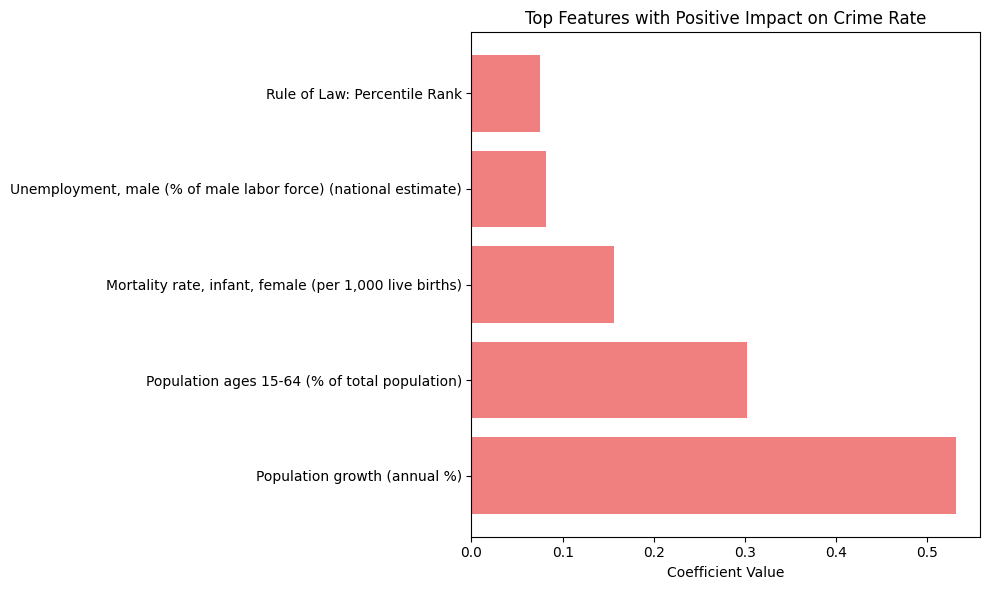

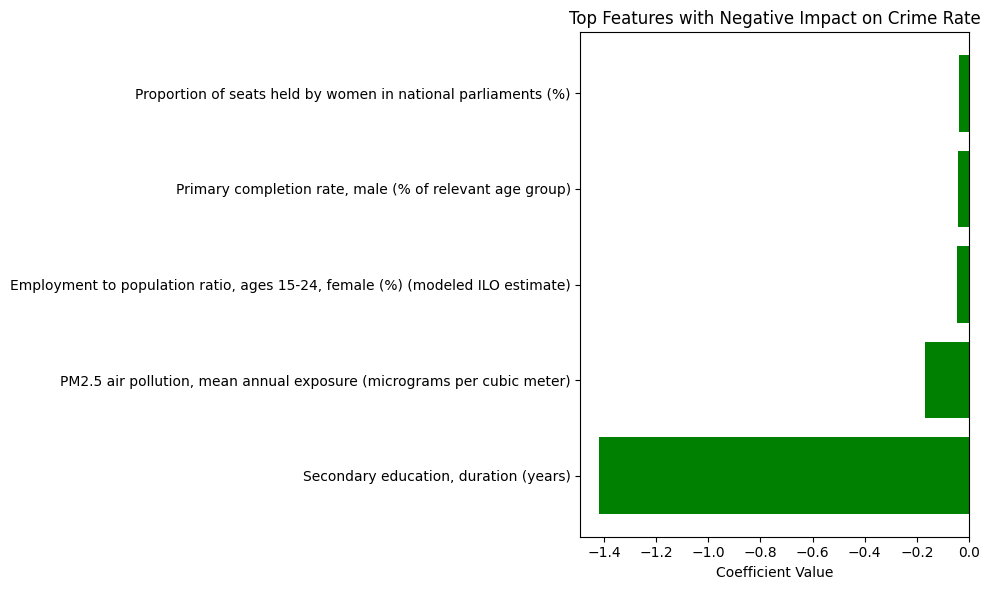

In [73]:
# Separate positive and negative coefficients
positive_coeffs = sorted_coefficients_df[sorted_coefficients_df['Coefficient'] > 0].head(5)
negative_coeffs = sorted_coefficients_df[sorted_coefficients_df['Coefficient'] < 0].head(5)

# Plotting positive impact features
plt.figure(figsize=(10, 6))
plt.barh(positive_coeffs['Feature'], positive_coeffs['Coefficient'], color='lightcoral')
plt.xlabel('Coefficient Value')
plt.title('Top Features with Positive Impact on Crime Rate')
plt.tight_layout()
plt.show()

# Plotting negative impact features
plt.figure(figsize=(10, 6))
plt.barh(negative_coeffs['Feature'], negative_coeffs['Coefficient'], color='green')
plt.xlabel('Coefficient Value')
plt.title('Top Features with Negative Impact on Crime Rate')
plt.tight_layout()
plt.show()


In [74]:
X_subset = X[['Secondary education, duration (years)', 'Primary education, duration (years)','Rule of Law: Percentile Rank', 'Compulsory education, duration (years)','Voice and Accountability: Estimate']]

# Merge X_subset with y on the index (assuming the index includes both 'Country Name' and 'Year')
merged_df = pd.merge(X_subset, y, left_index=True, right_index=True)

# Display the resulting DataFrame
merged_df.head(100)

Secondary education, duration (years)  \
Country Name               Year                                          
Afghanistan                1990                                    6.0   
                           1991                                    6.0   
                           1992                                    6.0   
                           1993                                    6.0   
                           1994                                    6.0   
...                                                                ...   
Africa Western and Central 2019                                    7.0   
                           2020                                    7.0   
                           2021                                    7.0   
                           2022                                    7.0   
Albania                    1990                                    8.0   

                                 Primary education, duration (years)  \
Country Name               Year                                        
Afghanistan                1990                                  6.0   
                           1991                                  6.0   
                           1992                                  6.0   
                           1993                                  6.0   
                           1994                                  6.0   
...                                                              ...   
Africa Western and Central 2019                                  6.0   
                           2020                                  6.0   
                           2021                                  6.0   
                           2022                                  6.0   
Albania                    1990                                  4.0   

                                 Rule of Law: Percentile Rank  \
Country Name               Year                                 
Afghanistan                1990                      0.030151   
                           1991                      0.276382   
                           1992                      0.522613   
                           1993                      0.768844   
                           1994                      1.015075   
...                                                       ...   
Africa Western and Central 2019                     49.620604   
                           2020                     49.620604   
                           2021                     49.620604   
                           2022                     49.620604   
Albania                    1990                     56.072861   

                                 Compulsory education, duration (years)  \
Country Name               Year                                           
Afghanistan                1990                                     6.0   
                           1991                                     6.0   
                           1992                                     6.0   
                           1993                                     6.0   
                           1994                                     6.0   
...                                                                 ...   
Africa Western and Central 2019                                     9.0   
                           2020                                     9.0   
                           2021                                     9.0   
                           2022                                     9.0   
Albania                    1990                                     8.0   

                                 Voice and Accountability: Estimate  \
Country Name               Year                                       
Afghanistan                1990                           -1.516257   
                           1991                           -1.581638   
                           

In [75]:
merged_df.loc[merged_df.index.get_level_values('Country Name') == 'Finland']


Secondary education, duration (years)  \
Country Name Year                                          
Finland      1990                                    6.0   
             1991                                    6.0   
             1992                                    6.0   
             1993                                    6.0   
             1994                                    6.0   
             1995                                    6.0   
             1996                                    6.0   
             1997                                    6.0   
             1998                                    6.0   
             1999                                    6.0   
             2000                                    6.0   
             2001                                    6.0   
             2002                                    6.0   
             2003                                    6.0   
             2004                                    6.0   
             2005                                    6.0   
             2006                                    6.0   
             2007                                    6.0   
             2008                                    6.0   
             2009                                    6.0   
             2010                                    6.0   
             2011                                    6.0   
             2012                                    6.0   
             2013                                    6.0   
             2014                                    6.0   
             2015                                    6.0   
             2016                                    6.0   
             2017                                    6.0   
             2018                                    6.0   
             2019                                    6.0   
             2020                                    6.0   
             2021                                    6.0   
             2022                                    6.0   

                   Primary education, duration (years)  \
Country Name Year                                        
Finland      1990                                  6.0   
             1991                                  6.0   
             1992                                  6.0   
             1993                                  6.0   
             1994                                  6.0   
             1995                                  6.0   
             1996                                  6.0   
             1997                                  6.0   
             1998                                  6.0   
             1999                                  6.0   
             2000                                  6.0   
             2001                                  6.0   
             2002                                  6.0   
             2003                                  6.0   
             2004                                  6.0   
             2005                                  6.0   
             2006                                  6.0   
             2007                                  6.0   
             2008                                  6.0   
             2009                                  6.0   
             2010                                  6.0   
             2011                                  6.0   
             2012                                  6.0   
             2013                                  6.0   
             2014                                  6.0   
             2015                                  6.0   
             2016                                  6.0   
             2017                                  6.0   
             2018                                  6.0   
             2019                                  6.0   
             2020                                  6.0   
    